In [1]:
#import pandas library for creating dataframe
import pandas as pd

In [2]:
#create dataframe
ebay_df = pd.read_csv("C:/Users/sourav singh/Downloads/eBayiPadTrain.csv")

In [3]:
#data overview
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 11 columns):
description    790 non-null object
biddable       1861 non-null int64
startprice     1861 non-null float64
condition      1861 non-null object
cellular       1861 non-null object
carrier        1861 non-null object
color          1861 non-null object
storage        1861 non-null object
productline    1861 non-null object
sold           1861 non-null int64
UniqueID       1861 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 160.0+ KB


In [4]:
#check if dataset consist of any null value
ebay_df.isnull().sum()

description    1071
biddable          0
startprice        0
condition         0
cellular          0
carrier           0
color             0
storage           0
productline       0
sold              0
UniqueID          0
dtype: int64

# Model is created by removing uniqueId field

In [5]:
model_wo_desc_x = ebay_df.drop(['UniqueID'],axis = 1)
model_wo_desc_x

,description,biddable,startprice,condition,cellular,carrier,color,storage,productline,sold
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,Used,0,None,Black,16,iPad 2,0
1,"Previously used, please read description. May ...",1,0.99,Used,1,Verizon,Unknown,16,iPad 2,1
2,NaN,0,199.99,Used,0,None,White,16,iPad 4,1
3,NaN,0,235.00,New other (see details),0,None,Unknown,16,iPad mini 2,0
4,Please feel free to buy. All products have bee...,0,199.99,Seller refurbished,Unknown,Unknown,Unknown,Unknown,Unknown,0
5,NaN,1,175.00,Used,1,AT&T,Space Gray,32,iPad mini 2,1
6,NaN,1,100.00,New,0,None,Space Gray,16,iPad mini,1
7,NaN,0,329.99,New,0,None,White,16,iPad mini 3,0
8,NaN,1,0.99,Used,1,Unknown,White,64,iPad 1,1
9,NaN,1,150.00,Used,0,None,White,32,iPad 4,1


### plot a graph to see how target data is distributed 

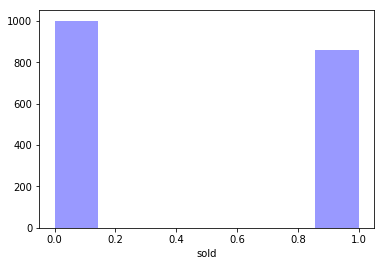

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(model_wo_desc_x['sold'], kde=False,hist = True, color='blue')

In [7]:
model_wo_desc_x['sold'].value_counts()

0    1001
1     860
Name: sold, dtype: int64

#### converting every column of dataframe into one-hot encoding and at the same time renaming column "Unkown" with meaning full column name 

In [8]:
encod_condition = pd.get_dummies(model_wo_desc_x.condition)
encod_carrier = pd.get_dummies(model_wo_desc_x.carrier)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_condition, encod_carrier], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_carrier'},inplace=True)

In [9]:
encod_color = pd.get_dummies(model_wo_desc_x.color)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_color], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_color'},inplace=True)

In [10]:
encod_storage = pd.get_dummies(model_wo_desc_x.storage)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_storage], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_storage'},inplace=True)

In [11]:
encod_productline = pd.get_dummies(model_wo_desc_x.productline)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_productline], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_productline'},inplace=True)

In [12]:
encod_cellular = pd.get_dummies(model_wo_desc_x.cellular)
encod_cellular.rename(columns={'0':'Celluar_notEnabled','1':'Cellular_enabled','Unknown':'Unknown_cellular'},inplace=True)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_cellular], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_cellular'},inplace=True)

### removing coulmns : condition,cellular,carrier,color, storage , productline

In [13]:
model_wo_desc_x.isnull().sum()

description                 1071
biddable                       0
startprice                     0
condition                      0
cellular                       0
carrier                        0
color                          0
storage                        0
productline                    0
sold                           0
For parts or not working       0
Manufacturer refurbished       0
New                            0
New other (see details)        0
Seller refurbished             0
Used                           0
AT&T                           0
None                           0
Other                          0
Sprint                         0
T-Mobile                       0
Unknown_carrier                0
Verizon                        0
Black                          0
Gold                           0
Space Gray                     0
Unknown_color                  0
White                          0
128                            0
16                             0
32        

In [14]:
# model_wo_desc_x['sold'].value_counts()
df_NAN = model_wo_desc_x[   model_wo_desc_x['description'].isna() ]
df_NAN['sold'].value_counts()

0    555
1    516
Name: sold, dtype: int64

In [15]:
model_wo_desc_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 48 columns):
description                 790 non-null object
biddable                    1861 non-null int64
startprice                  1861 non-null float64
condition                   1861 non-null object
cellular                    1861 non-null object
carrier                     1861 non-null object
color                       1861 non-null object
storage                     1861 non-null object
productline                 1861 non-null object
sold                        1861 non-null int64
For parts or not working    1861 non-null uint8
Manufacturer refurbished    1861 non-null uint8
New                         1861 non-null uint8
New other (see details)     1861 non-null uint8
Seller refurbished          1861 non-null uint8
Used                        1861 non-null uint8
AT&T                        1861 non-null uint8
None                        1861 non-null uint8
Other                

In [16]:
model_wo_desc_x_OHE = model_wo_desc_x.drop(['condition','cellular','carrier','color','storage','productline'],axis=1)
model_wo_desc_x_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 42 columns):
description                 790 non-null object
biddable                    1861 non-null int64
startprice                  1861 non-null float64
sold                        1861 non-null int64
For parts or not working    1861 non-null uint8
Manufacturer refurbished    1861 non-null uint8
New                         1861 non-null uint8
New other (see details)     1861 non-null uint8
Seller refurbished          1861 non-null uint8
Used                        1861 non-null uint8
AT&T                        1861 non-null uint8
None                        1861 non-null uint8
Other                       1861 non-null uint8
Sprint                      1861 non-null uint8
T-Mobile                    1861 non-null uint8
Unknown_carrier             1861 non-null uint8
Verizon                     1861 non-null uint8
Black                       1861 non-null uint8
Gold                       

### fill all NAN in DESC column with nill

In [17]:
model_wo_desc_x_OHE['description'].fillna('Neutal',inplace=True)


In [18]:
model_wo_desc_x_OHE.head()

,description,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,...,iPad 5,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,"Previously used, please read description. May ...",1,0.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,Neutal,0,199.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,Neutal,0,235.00,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,Please feel free to buy. All products have bee...,0,199.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
print(model_wo_desc_x_OHE['description'].isna().sum().sum())
print(model_wo_desc_x_OHE['description'].count())

0
1861


In [20]:
# library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
#nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
  
# Initialize empty array to append clean text 
corpus = []  
  
# 1000 (reviews) rows to clean 
for i in range(0, 1861):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', model_wo_desc_x_OHE['description'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)
    
#     from nltk import ngrams

#     sixgrams = ngrams(review.split(), 3)
    
#     for grams in sixgrams:
#         corpus.append(grams)   
    # append each string to create 
    # array of clean text  
         
    # append each string to create 
    # array of clean text  
    corpus.append(review) 

In [21]:
corpus

['ipad cosmet condit',
 'previous use pleas read descript may show sign use scratch screen',
 'neutal',
 'neutal',
 'pleas feel free buy product thoroughli inspect clean test',
 'neutal',
 'neutal',
 'neutal',
 'neutal',
 'neutal',
 'good condit minor wear tear bodi light scratch screen function great',
 'neutal',
 'good condit clean icloud lock clean imei tablet fulli test work',
 'neutal',
 'new digit instal scratch back small dent top right bottom left corner',
 'neutal',
 'great work ipad minor surfac scratch back pictur light scratch',
 'sell good qualiti ipad fulli test appl certifi technician',
 'neutal',
 'neutal',
 'crack screen',
 'great work ipad light scratch consist typic wear pictur',
 'fulli function clean esn',
 'neutal',
 'neutal',
 'ipad mini open box item good condit includ origin box includ genuin',
 'fulli function',
 'ipad use good cosmet condit minor scratch bodi normal',
 'custom carrier return cosmet condit origin box',
 'come usb cabl wall adapt may minor ding

In [22]:
model_wo_desc_x_OHE['new_Phrase']=corpus
model_wo_desc_x_OHE.head(15)

,description,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,...,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular,new_Phrase
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,ipad cosmet condit
1,"Previously used, please read description. May ...",1,0.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,previous use pleas read descript may show sign...
2,Neutal,0,199.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,neutal
3,Neutal,0,235.00,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,neutal
4,Please feel free to buy. All products have bee...,0,199.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,pleas feel free buy product thoroughli inspect...
5,Neutal,1,175.00,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,neutal
6,Neutal,1,100.00,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,neutal
7,Neutal,0,329.99,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,neutal
8,Neutal,1,0.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,neutal
9,Neutal,1,150.00,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,neutal


### remove the desc column

In [23]:
model_wo_desc_x_OHE

,description,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,...,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular,new_Phrase
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,ipad cosmet condit
1,"Previously used, please read description. May ...",1,0.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,previous use pleas read descript may show sign...
2,Neutal,0,199.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,neutal
3,Neutal,0,235.00,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,neutal
4,Please feel free to buy. All products have bee...,0,199.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,pleas feel free buy product thoroughli inspect...
5,Neutal,1,175.00,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,neutal
6,Neutal,1,100.00,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,neutal
7,Neutal,0,329.99,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,neutal
8,Neutal,1,0.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,neutal
9,Neutal,1,150.00,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,neutal


In [24]:
model_wo_desc_x_OHE_Y = model_wo_desc_x_OHE["sold"]
model_wo_desc_x_OHE_X = model_wo_desc_x_OHE.drop("sold", axis=1)
for col in model_wo_desc_x_OHE_X.columns:
    print(col)

description
biddable
startprice
For parts or not working
Manufacturer refurbished
New
New other (see details)
Seller refurbished
Used
AT&T
None
Other
Sprint
T-Mobile
Unknown_carrier
Verizon
Black
Gold
Space Gray
Unknown_color
White
128
16
32
64
Unknown_storage
Unknown_productline
iPad 1
iPad 2
iPad 3
iPad 4
iPad 5
iPad Air
iPad Air 2
iPad mini
iPad mini 2
iPad mini 3
iPad mini Retina
Celluar_notEnabled
Cellular_enabled
Unknown_cellular
new_Phrase


In [25]:
model_wo_desc_x_OHE_X

,description,biddable,startprice,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,...,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular,new_Phrase
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,ipad cosmet condit
1,"Previously used, please read description. May ...",1,0.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,previous use pleas read descript may show sign...
2,Neutal,0,199.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,neutal
3,Neutal,0,235.00,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,neutal
4,Please feel free to buy. All products have bee...,0,199.99,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,pleas feel free buy product thoroughli inspect...
5,Neutal,1,175.00,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,neutal
6,Neutal,1,100.00,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,neutal
7,Neutal,0,329.99,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,neutal
8,Neutal,1,0.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,neutal
9,Neutal,1,150.00,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,neutal


In [165]:
# list of text documents
from sklearn.feature_extraction.text import TfidfVectorizer
bag=model_wo_desc_x_OHE_X['new_Phrase']
# create the transform
vectorizer1 = TfidfVectorizer(ngram_range=(5,5),norm=None,analyzer='word')
# tokenize and build vocab
vectorizer1.fit(bag)
# summarize
print(vectorizer1.vocabulary_)
print(vectorizer1.idf_)
# encode document
vector1 = vectorizer1.transform(bag)
# summarize encoded vector
print(vector1.shape)
print(vector1.toarray())
bow_tfidf = vector1.toarray()

{'previous use pleas read descript': 1769, 'use pleas read descript may': 2370, 'pleas read descript may show': 1733, 'read descript may show sign': 1808, 'descript may show sign use': 619, 'may show sign use scratch': 1376, 'show sign use scratch screen': 2061, 'pleas feel free buy product': 1730, 'feel free buy product thoroughli': 742, 'free buy product thoroughli inspect': 760, 'buy product thoroughli inspect clean': 227, 'product thoroughli inspect clean test': 1776, 'good condit minor wear tear': 891, 'condit minor wear tear bodi': 413, 'minor wear tear bodi light': 1451, 'wear tear bodi light scratch': 2425, 'tear bodi light scratch screen': 2207, 'bodi light scratch screen function': 151, 'light scratch screen function great': 1278, 'good condit clean icloud lock': 867, 'condit clean icloud lock clean': 345, 'clean icloud lock clean imei': 293, 'icloud lock clean imei tablet': 1014, 'lock clean imei tablet fulli': 1336, 'clean imei tablet fulli test': 297, 'imei tablet fulli te

In [166]:
bag_df_tfidf = pd.DataFrame(bow_tfidf)
bag_df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
X_desc_final_tiidf = pd.concat([model_wo_desc_x_OHE_X, bag_df_tfidf], axis=1)
X_desc_final_tiidf.drop(['new_Phrase','description'],axis=1,inplace = True)
# for col in X_desc_final_tiidf.columns: 
#     print(col)
X_desc_final_tiidf

,biddable,startprice,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,None,...,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561
0,0,159.99,0,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.99,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,199.99,0,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,235.00,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,199.99,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,175.00,0,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,100.00,0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,329.99,0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0.99,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,150.00,0,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
from sklearn.model_selection import train_test_split
X_train_desc_tiidf, X_test_desc_tiidf, y_train_desc_tiidf, y_test_desc_tiidf = train_test_split(X_desc_final_tiidf, model_wo_desc_x_OHE_Y, test_size = 0.20,random_state=50) 

In [169]:
from sklearn.ensemble import RandomForestClassifier 
 
model_rfc_tiidf = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',max_depth = 70)
model_rfc_tiidf.fit(X_train_desc_tiidf,y_train_desc_tiidf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
model_rfc_tiidf.score(X_test_desc_tiidf, y_test_desc_tiidf)

0.8042895442359249

### Logistic Regression 

In [191]:
from sklearn.linear_model import LogisticRegression 
logreg_desc_tiidf = LogisticRegression()
logreg_desc_tiidf.fit(X_train_desc_tiidf,y_train_desc_tiidf)
logreg_desc_tiidf.score(X_test_desc_tiidf, y_test_desc_tiidf)

C:\Users\sourav singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8203753351206434

In [192]:
from sklearn.tree import DecisionTreeClassifier
decTree_desc_tiidf = DecisionTreeClassifier()
decTree_desc_tiidf.fit(X_train_desc_tiidf,y_train_desc_tiidf)
decTree_desc_tiidf.score(X_test_desc_tiidf, y_test_desc_tiidf)

0.7560321715817694

In [193]:
from sklearn.naive_bayes import GaussianNB 
gnb_tiidf = GaussianNB() 
gnb_tiidf.fit(X_train_desc_tiidf,y_train_desc_tiidf)
gnb_tiidf.score(X_test_desc_tiidf, y_test_desc_tiidf)
# gnb_tiidf_ypred =gnb_tiidf.predict(X_test_desc_tiidf)
# print(gnb_tiidf_ypred)

0.5656836461126006

In [194]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_desc_tiidf,gnb_tiidf_ypred)
cm

array([[ 19, 158],
       [  4, 192]], dtype=int64)

In [195]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_desc_tiidf,gnb_tiidf_ypred)

0.5656836461126006

In [196]:
from sklearn.naive_bayes import MultinomialNB
MulNB_tiidf = MultinomialNB()
MulNB_tiidf.fit(X_train_desc_tiidf,y_train_desc_tiidf)
MulNB_tiidf.score(X_test_desc_tiidf, y_test_desc_tiidf)

0.6863270777479893

In [197]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=12, learning_rate = 1.0, max_features=700, max_depth = 20, random_state = 0)
gb.fit(X_train_desc_tiidf,y_train_desc_tiidf)
gb.score(X_test_desc_tiidf, y_test_desc_tiidf)

0.8016085790884718